In [1]:
import sys  ###mclglobal1（下のセルも）
sys.path.append('../scripts/')
from mcl import *

In [2]:
class GlobalMcl(Mcl):  
    def __init__(self, envmap, num, motion_noise_stds={"nn":0.19, "no":0.001, "on":0.13, "oo":0.2},\
                 distance_dev_rate=0.14, direction_dev=0.05): #姿勢の引数を消す
        super().__init__(envmap, np.array([0, 0, 0]).T, num, motion_noise_stds, distance_dev_rate, direction_dev) #初期姿勢は適当に
        for p in self.particles: #ランダムに姿勢を初期化し直す
            p.pose = np.array([np.random.uniform(-5.0, 5.0), np.random.uniform(-5.0, 5.0), np.random.uniform(-math.pi, math.pi)]).T

In [3]:
def trial(animation): ###mclglobal1test
    time_interval = 0.1
    world = World(30, time_interval, debug=not animation) 

    ## 地図を生成して3つランドマークを追加 ##
    m = Map()
    m.append_landmark(Landmark(-4,2))
    m.append_landmark(Landmark(2,-3))
    m.append_landmark(Landmark(3,3))
    world.append(m)

    ## ロボットを作る ##
    init_pose = np.array([np.random.uniform(-5.0, 5.0), np.random.uniform(-5.0, 5.0), np.random.uniform(-math.pi, math.pi)]).T
    pf = GlobalMcl(m, 100)
    a = MclAgent(time_interval, 0.2, 10.0/180*math.pi, pf)
    r = Robot(init_pose, sensor=Camera(m), agent=a, color="red")
    world.append(r)

    world.draw()
    
    return (r.pose, pf.ml.pose)

In [4]:
if __name__ == '__main__': ###mclglobal1exec
    ok = 0
    for i in range(1000):
        actual, estm = trial(False)
        diff = math.sqrt((actual[0]-estm[0])**2 + (actual[1]-estm[1])**2)
        print(i, "真値:", actual, "推定値", estm, "誤差:", diff)
        if diff <= 1.0:
            ok += 1

    ok

0 真値: [-3.76509689  0.56884216  4.65928352] 推定値 [-3.59160797  0.70967083  4.35029996] 誤差: 0.2234527212059518
1 真値: [ 6.28238751 -2.07579148  1.90145132] 推定値 [-1.9406367  -3.58408023  5.69701208] 誤差: 8.360207053760607
2 真値: [-5.84392622 -4.27460238  5.15436515] 推定値 [3.99227636 3.86363583 3.28209971] 誤差: 12.766432636122591
3 真値: [ 2.53837333 -3.07767511  3.61330361] 推定値 [ 2.42358189 -3.28151259  3.12714725] 誤差: 0.23393759174061163
4 真値: [-2.76680093 -3.85773403  3.06078759] 推定値 [-0.87080374  0.74125069  7.82843479] 誤差: 4.974481465823168
5 真値: [-4.04609961 -0.84760628  4.61191463] 推定値 [-4.09761752 -1.21346554  3.92949712] 誤差: 0.36946866786185817
6 真値: [1.41519347 1.92653404 3.52706346] 推定値 [-0.48977733 -5.14602071  6.26629159] 誤差: 7.3246122418878965
7 真値: [-1.31159645 -1.80577455  6.03789616] 推定値 [-1.36208431 -2.07503281  6.16787516] 誤差: 0.27395078513289256
8 真値: [ 1.82467563 -2.09216001  2.61887747] 推定値 [ 2.61390955 -4.00735399  6.18155823] 誤差: 2.0714386729627785
9 真値: [-0.92286963 -3.28

KeyboardInterrupt: 

<IPython.core.display.Javascript object>


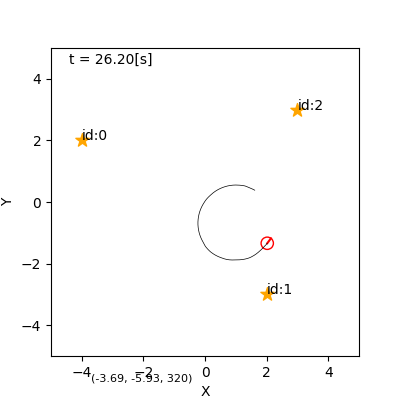

(array([1.61500205, 0.3836579 , 2.64457257]),
 array([-2.05734507, -3.18781793, -2.17131896]))

In [13]:
trial(True)